# Homework #4 Part I: Fit this model using HMC in `PyMC`

For the model specification example considered in "Metropolis within Gibbs" above...


## Provide posterior analysis for this model using "default" `PyMC` 

- Don't try to do "Metropolis within Gibbs" `in PyMC` -- you can't -- use the default HMC sampler
- You can do this without knowing what HMC is: you've already previously used HMC with `PyMC`; and, you can go get the distributions you need [here...](https://www.pymc.io/projects/docs/en/stable/api/distributions.html)
- ***Explore and describe the sample sizes needed to support inference regarding the `df` parameter $(\nu)$***

*Ahem...*

- Is it eating you up inside that you don't know what HMC actualy is? 
- Do you hate just using something without knowing what it is?<br>Or what you're even doing when you use it? 

*Well then, my friends, have I got the cure for you!*<br>All **you** must **do** is listen **to** someone **who** will re**view** for **you** the next slides **few**!


In [13]:
import matplotlib.pyplot as plt
import pymc as pm
from scipy import stats
import arviz as az
import numpy as np
import pandas as pd

In [19]:
x = stats.t(df = 15, loc = 10, scale = 2).rvs(1000)
location_scale_model = pm.Model()
with location_scale_model: 
    loc = pm.Normal("loc", mu=0, sigma=1)
    scale = pm.HalfNormal("scale", sigma=5)
    df = pm.DiscreteUniform("df", lower = 1, upper = 100)
    x_obs = pm.StudentT("likelihood", mu = loc, sigma = scale, nu = df, observed=x)

with location_scale_model:
    idata_HMC = pm.sample()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [loc, scale]
>Metropolis: [df]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


array([[<Axes: title={'center': 'loc'}>, <Axes: title={'center': 'loc'}>],
       [<Axes: title={'center': 'df'}>, <Axes: title={'center': 'df'}>],
       [<Axes: title={'center': 'scale'}>,
        <Axes: title={'center': 'scale'}>]], dtype=object)

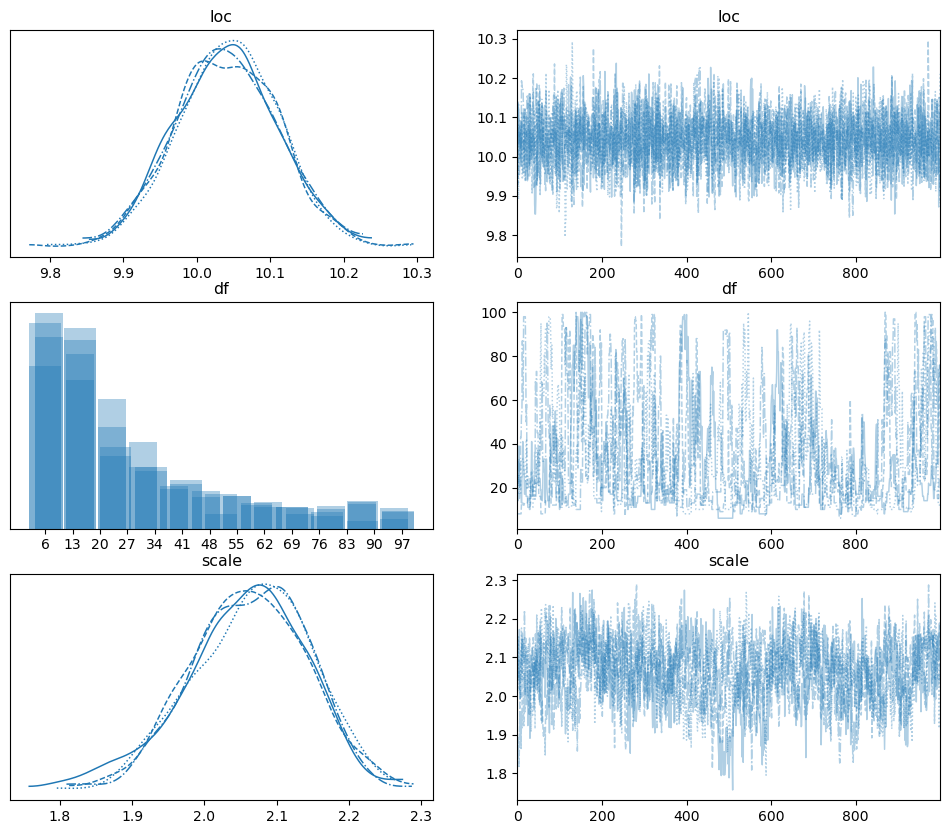

In [20]:
fig,ax = plt.subplots(3,2, figsize=(12,10))
az.plot_trace(idata_HMC, axes=ax[:3,:2])


# Homework #4 Part II: HMC Diagnostics 

- Return to your posterior analysis in "Homework #4 Part I" and 
report on (a) ***effective sample sizes***; (b) ***chain convergence measures***; (c) ***divergences***; (d) ***Metropolis-Hastings acceptance rates*** [see below for how to access these]; and (e) any other warnings or concers provided by `PyMC` 

- Now examine the [Eight Schools](https://github.com/pointOfive/STA410_W24_StatisticalComputation/blob/main/Week3/STA410_W24_Week3_Demo_HMCwithPyMC.ipynb) example PyMC model and outputted results
    - Provide an analogous report regarding (a)-(e) above for the "centered" and "uncentered" Eight Schools models
        - *Hint: for (d) see `fit_C.sample_stats.acceptance_rate.values.flatten()` and `fit_NC.sample_stats.acceptance_rate.values.flatten()` and in the Eight Schools example* 
    - From the perspective of ***curvature*** of the ***energy function*** (that is, how rapidly the ***log joint posterior distribution density*** changes for different values of its ***random variable (parameters)*** and the effectiveness of the ***HMC*** algorithm, explain why the "uncentered" paramterization of the model performs better than the "centered" parameterization
        - *Hint: see the previous two slides...*
- Review [this](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html#model-checking) and [that](https://discourse.pymc.io/t/about-nuts-sampling-and-energy-plot/831) discussing the ***diagnostic plot*** which compares the ***observed energy proposal distribution*** versus the ***empirical energy distribution*** of the generated HMC samples
    - Use the code on the next slide to provide and interpret the ***diagnostic plot*** assessing ***energy proposals*** versus the empirical ***energy*** distribution to compare and contrast the "centered" and "uncentered" Eight Schools models in relation to you previous comparision of these two model parameterization in terms of ***energy function curvature*** and the effectiveness of the ***HMC*** algorithm... does this diagnostic support your previous conclusions in these regards?




## continue on Part I

In [21]:
az.summary(idata_HMC, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc,10.04,0.07,9.91,10.17,0.00,0.00,3293.03,2557.01,1.00
df,31.57,23.55,6.00,83.00,1.74,1.23,160.15,270.26,1.01
scale,2.06,0.08,1.91,2.21,0.00,0.00,280.34,557.12,1.01


（a）We can see from the table that for location parameter, there is approximatly 3293 effective sample size. For df parameter, there is only 160 effective parameter. Then, for scale parameter, there is approximately 280 effective parameter.


 (b) & (c) From the plot above, it is evident that both the location parameter and scale parameter converge to their true values. However, the convergence of the df parameter appears to be problematic, suggesting possible divergence. The summary table supports this observation, indicating that the standard deviation for the location and scale parameters is less than 0.1, while it exceeds 20 for the df parameter. Although the Gelman-Rubin statistic (r-hat) for all parameters is below 1.05, indicating reasonable convergence, caution is warranted regarding the df parameter. The small effective sample size per chain for df imply unrealiable r-hat, further emphasizing the need for cautious interpretation and potential investigation into the cause of the lack of convergence.


In [22]:
idata_HMC.sample_stats.acceptance_rate.values.flatten()

array([0.85128286, 0.99877611, 0.98803396, ..., 0.68481574, 0.93128202,
       0.94905512])

(d) we can see from the array above that the acceptance rate is high for most sample.(it is higher than 0.8)

(e) When we generate the sample, the python shows that "The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation." Combining our table above, it is apparent that the df parameter have a small effective sample size. In other words, our r-hat might not be reiable to suggest the convergence.

## Eight Schools

### Code provide by prof:

In [6]:
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

In [7]:
with pm.Model() as Centered_eight:

    # We assume the following prior distributions for our parameters
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)

    # and we assume the following probabilistic hierarchy
    # within the data generating mechanism
    theta = pm.Normal("theta", mu=mu, sigma=tau, shape=J) # theta is length J=8

    # Note that if tau was small, then the density evalution above
    # could change rapidly for changes in theta
    # This means that the energy has high curvature

    # likelihood where observed information enters into the model
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

In [8]:
SEED = [20100420, 20134234] # random seeds for each of two run HMC chains
with Centered_eight:
    fit_C = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                      return_inferencedata=True, idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, tau, theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 10 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [9]:
# As is seen above, there are many divergences because the specification above
# induces high curature in the energy, but the following alternative
# parameterization alleviates this problem.

with pm.Model() as NonCentered_eight:

    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta_tilde = pm.Normal("theta_t", mu=0, sigma=1, shape=J)
    # Changes in theta now take place on a fixed scale that is independent of tau

    theta = pm.Deterministic("theta", mu + tau * theta_tilde)
    # Changes in tau can still result in rapid changes in the density evaluations
    # below so the energy still has high curvature with respect to tau; but,
    # it no longer has high curvature with respect to theta
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

In [10]:

with NonCentered_eight:
    fit_NC = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                       return_inferencedata=True, idata_kwargs={"log_likelihood": True})
# Now very few divergences... problem solved!
     

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, tau, theta_t]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 5 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


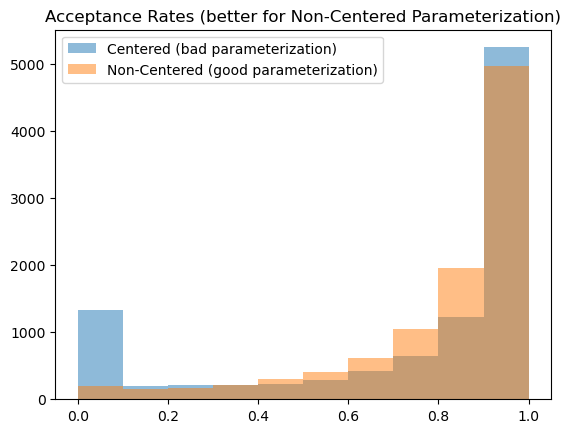

In [11]:
import matplotlib.pyplot as plt
plt.hist(fit_C.sample_stats.acceptance_rate.values.flatten(), alpha=0.5,
         label='Centered (bad parameterization)');
plt.hist(fit_NC.sample_stats.acceptance_rate.values.flatten(), alpha=0.5,
         label='Non-Centered (good parameterization)');
plt.title('Acceptance Rates (better for Non-Centered Parameterization)'); plt.legend();

In [14]:
print("Effective Sample Sizes (function of Markov Chain autocorrelation dependency)")
pd.concat(
[pd.DataFrame({'Centered': pm.summary(fit_C)[:1]['ess_bulk'],
              'Non-Centered': pm.summary(fit_NC)['ess_bulk'][:1]}),
 pd.DataFrame({'Centered': pm.summary(fit_C)[1:]['ess_bulk'],
              'Non-Centered': pm.summary(fit_NC)['ess_bulk'][9:]})])

Effective Sample Sizes (function of Markov Chain autocorrelation dependency)


,Centered,Non-Centered
mu,742.0,11904.0
tau,60.0,5956.0
theta[0],1179.0,9879.0
theta[1],1366.0,11655.0
theta[2],1754.0,10704.0
theta[3],1808.0,11938.0
theta[4],1724.0,12008.0
theta[5],1960.0,11047.0
theta[6],1087.0,10834.0
theta[7],1947.0,10959.0


### answer:


(a) The table reveals that non-centered data has significantly higher effective sample sizes compared to centered data with the same sample size. Specifically, for the parameter theta, the effective sample size for non-centered data is nearly five times that of centered data. Similarly, for parameters mu and tau, the effective sample size for non-centered data is approximately ten times greater than that for centered data.

array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>],
       [<Axes: title={'center': 'tau'}>, <Axes: title={'center': 'tau'}>]],
      dtype=object)

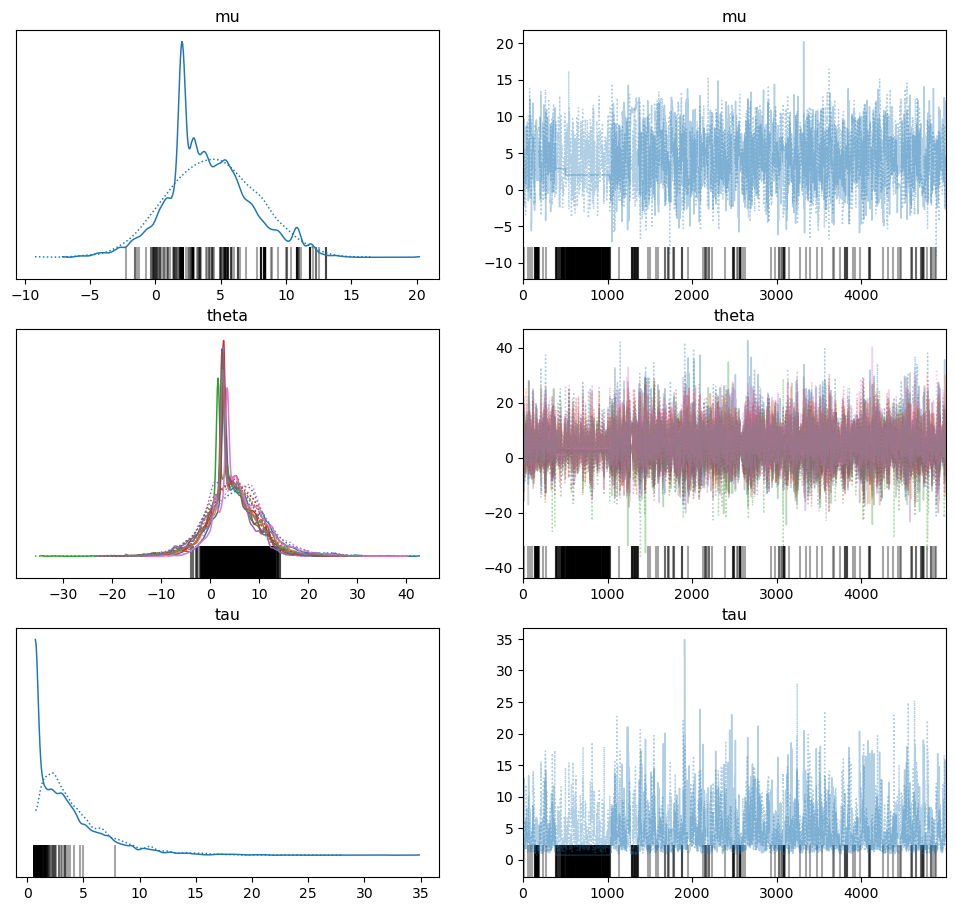

In [46]:
fig,ax = plt.subplots(3,2, figsize=(12,11))
az.plot_trace(fit_C, axes=ax[:3,:2])

array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'theta_t'}>,
        <Axes: title={'center': 'theta_t'}>],
       [<Axes: title={'center': 'tau'}>, <Axes: title={'center': 'tau'}>],
       [<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

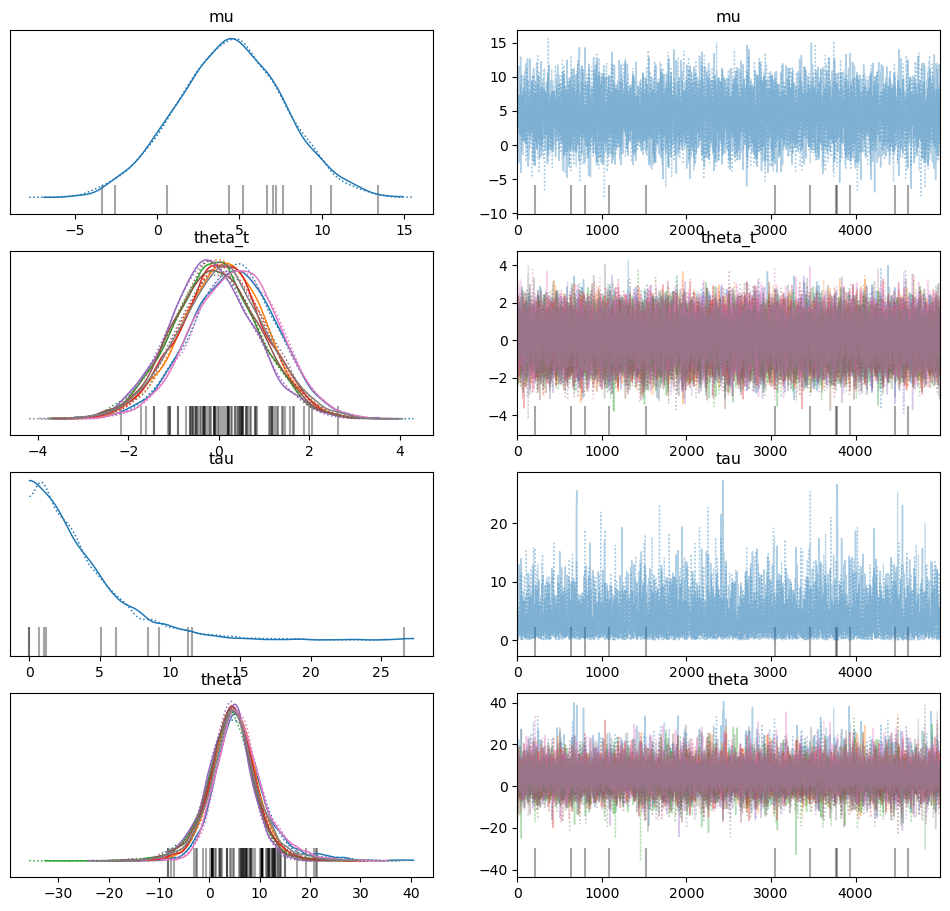

In [52]:
fig,ax = plt.subplots(4,2, figsize=(12,11))
az.plot_trace(fit_NC, axes=ax[:4,:2])

In [35]:
az.summary(fit_C, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta[0],6.34,5.90,-3.69,17.91,0.16,0.11,1179.23,2851.28,1.00
theta[1],4.95,4.97,-4.81,14.13,0.13,0.10,1365.98,4333.22,1.00
theta[2],3.69,5.56,-6.23,14.64,0.12,0.11,1754.17,3517.99,1.00
theta[3],4.63,4.94,-4.40,14.18,0.11,0.10,1807.94,5272.68,1.00
theta[4],3.27,4.76,-5.54,12.86,0.11,0.12,1724.37,3452.88,1.01
theta[5],3.78,5.10,-6.05,13.26,0.11,0.09,1959.60,3571.33,1.01
theta[6],6.50,5.29,-2.85,16.75,0.16,0.11,1087.23,3476.70,1.00
theta[7],4.81,5.51,-5.72,14.96,0.12,0.08,1946.86,4318.71,1.00
tau,4.13,3.24,0.69,10.05,0.18,0.13,59.84,20.08,1.04


In [44]:
az.summary(fit_NC, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,4.41,3.27,-1.90,10.42,0.03,0.02,11903.60,6680.07,1.0
theta_t[0],0.32,0.96,-1.47,2.14,0.01,0.01,11852.45,7047.14,1.0
theta_t[1],0.10,0.93,-1.69,1.83,0.01,0.01,15651.36,7495.38,1.0
theta_t[2],-0.08,0.97,-1.83,1.81,0.01,0.01,16057.59,7168.45,1.0
theta_t[3],0.06,0.95,-1.70,1.84,0.01,0.01,14902.11,7324.68,1.0
theta_t[4],-0.16,0.94,-1.93,1.63,0.01,0.01,16499.83,7639.02,1.0
theta_t[5],-0.07,0.96,-1.85,1.73,0.01,0.01,13772.90,7344.10,1.0
theta_t[6],0.36,0.95,-1.43,2.14,0.01,0.01,13822.12,7340.51,1.0
theta_t[7],0.07,0.98,-1.83,1.87,0.01,0.01,14590.20,7186.53,1.0
tau,3.63,3.28,0.00,9.46,0.05,0.04,5956.38,4441.06,1.0


(b) & (c) We observe from the above graph that none of the distributions in centered data exhibit a normal distribution, whereas all distributions in non-centered data are normally distributed. Additionally, the R-hat statistic for all parameters in non-centered data precisely equals 1, while for some theta and tau parameters in centered data, it exceeds 1. Consequently, non-centered data demonstrates better convergence of the chain compared to centered data.

In [17]:
fit_C.sample_stats.acceptance_rate.values.flatten()

array([0.9339    , 0.650432  , 0.92738656, ..., 0.90158151, 0.21343995,
       0.20100958])

In [18]:
fit_NC.sample_stats.acceptance_rate.values.flatten()

array([0.96584575, 0.96401304, 0.95955225, ..., 0.91078674, 0.86984342,
       0.94029322])

(d) Additionally, an examination of the array and graph(provided by the professor) reveals a significantly higher acceptance rate for the non-centered data compared to the centered data. The majority of acceptance rates for the non-centered model exceed 0.9, whereas for the centered model, a notable proportion of acceptance rates can even fall below 0.2.

(e) Furthermore, the Python output emphasizes that: "We recommend running at least 4 chains for robust computation of convergence diagnostics." This recommendation underscores the importance of running multiple chains to enhance reliability. However, due to constraints such as time, computational resources, and model complexity, the analysis was conducted with only 2 chains.

In the "centered" parameterization, the parameters are directly sampled and contribute to the shape of the energy landscape. However, this can result in regions of high curvature where the energy landscape changes rapidly, making it challenging for the HMC algorithm to explore the space efficiently. This high curvature can lead to inefficient sampling and poor convergence.

On the other hand, the "uncentered" parameterization introduces auxiliary variables that decouple the original parameters, redistributing the curvature in the energy landscape. By doing so, the HMC algorithm is provided with a more favorable landscape to traverse during sampling. This redistribution of curvature can result in more efficient exploration of the parameter space, leading to improved convergence and faster mixing of the chains.

In summary, the "uncentered" parameterization helps to mitigate issues related to the curvature of the energy function, making it more amenable to the HMC algorithm and enhancing its overall performance in sampling from the posterior distribution.

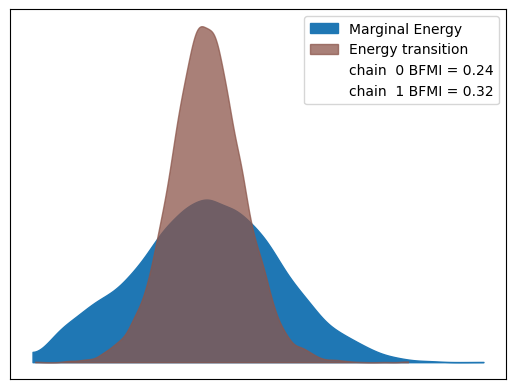

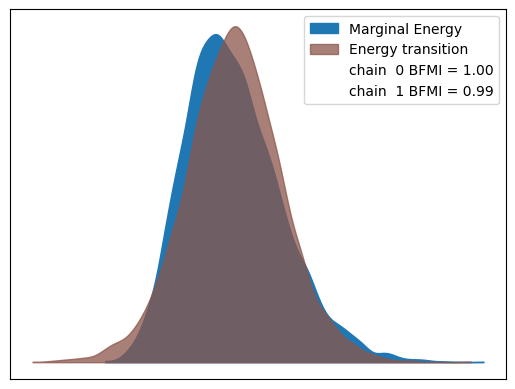

In [32]:
az.plot_energy(fit_C);
az.plot_energy(fit_NC);

An energy plot helps us check if our algorithm explored the posterior distribution well. If it didn't, our estimates might be biased because some parts of the posterior weren't explored enough. The plot compares two distributions: one shows the energy distribution during the sampling run, and the other shows the distribution of energy transitions between steps. Looking at the fit_C graph, we see a big difference between these two distributions, suggesting that the posterior wasn't explored adequately, and bias might be present. However, in the fit_NC graph, the two distributions look similar, indicating that the algorithm did a good job exploring the posterior.